In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

category_names.csv
sample_submission.csv
train.bson
train_example.bson



In [4]:
import io
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data

In [4]:
# Simple data processing

data = bson.decode_file_iter(open('./data/train_example.bson', 'rb'))

prod_to_category = dict()

for c, d in enumerate(data):
    product_id = d['_id']
    category_id = d['category_id'] # This won't be in Test data
    prod_to_category[product_id] = category_id
    for e, pic in enumerate(d['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        # do something with the picture, etc

prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
prod_to_category.index.name = '_id'
prod_to_category.rename(columns={0: 'category_id'}, inplace=True)

In [5]:
prod_to_category.head()

,category_id
_id,
0,1000010653
1,1000010653
2,1000004079
3,1000004141
4,1000015539


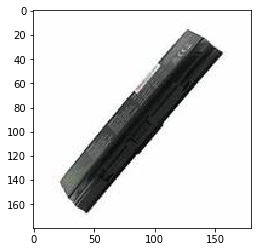

In [6]:
plt.imshow(picture)
plt.show()

In [ ]:
with open('./data/train.bson','rb') as b:
    df = pd.DataFrame(bson.decode_all(b.read()))
df['imgs'] = df['imgs'].apply(lambda rec: rec[0]['picture'])
df.set_index('category_id',inplace=True)

In [8]:
df.head()

,_id,imgs
category_id,,
1000010653,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1000010653,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1000004079,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1000004141,3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1000015539,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [9]:
x = [imread(io.BytesIO(a)) for a in df['imgs'].as_matrix().tolist()]

In [10]:
X = np.asarray(x)
X.shape

(82, 180, 180, 3)

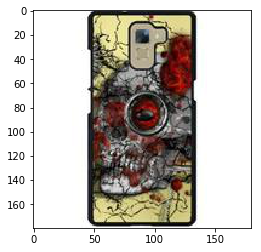

In [11]:
picture = imread(io.BytesIO(df.iloc[1,1]))
plt.imshow(picture)
plt.show()

In [26]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (180, 180, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 256, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 512, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(GlobalAveragePooling2D(data_format=None))
model.add(Dense(36, activation = 'softmax'))
#model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
df.index.values

array([1000010653, 1000010653, 1000004079, 1000004141, 1000015539,
       1000010653, 1000005744, 1000004079, 1000010667, 1000018290,
       1000010653, 1000018306, 1000010961, 1000015309, 1000010653,
       1000007361, 1000018294, 1000014287, 1000010653, 1000005910,
       1000010653, 1000001859, 1000010653, 1000010653, 1000010653,
       1000010647, 1000010653, 1000018290, 1000004079, 1000010653,
       1000010653, 1000011423, 1000010653, 1000010653, 1000012989,
       1000004079, 1000010653, 1000012558, 1000010061, 1000010653,
       1000010653, 1000005990, 1000010653, 1000010653, 1000012993,
       1000014396, 1000010653, 1000010653, 1000003787, 1000010706,
       1000007138, 1000010653, 1000010653, 1000003191, 1000010653,
       1000010667, 1000010653, 1000010653, 1000018294, 1000010645,
       1000003977, 1000005796, 1000010653, 1000010653, 1000013922,
       1000010667, 1000010653, 1000004141, 1000010683, 1000010653,
       1000010641, 1000010461, 1000010653, 1000010653, 1000010

In [40]:
targets = df.index.values
unique_ids = np.unique(targets)
num_classes = len(unique_ids)
mapping = dict(zip(unique_ids, range(num_classes)))
mapping

{1000001859: 0,
 1000003191: 1,
 1000003787: 2,
 1000003977: 3,
 1000004079: 4,
 1000004085: 5,
 1000004141: 6,
 1000005744: 7,
 1000005796: 8,
 1000005910: 9,
 1000005990: 10,
 1000007138: 11,
 1000007361: 12,
 1000010061: 13,
 1000010461: 14,
 1000010641: 15,
 1000010645: 16,
 1000010647: 17,
 1000010653: 18,
 1000010667: 19,
 1000010683: 20,
 1000010706: 21,
 1000010961: 22,
 1000011423: 23,
 1000012558: 24,
 1000012989: 25,
 1000012993: 26,
 1000013922: 27,
 1000014053: 28,
 1000014287: 29,
 1000014396: 30,
 1000015309: 31,
 1000015539: 32,
 1000018290: 33,
 1000018294: 34,
 1000018306: 35}

In [41]:
mapping.get(1000018290)

33

In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

datagen = ImageDataGenerator()
batch_size = 16
Y= np_utils.to_categorical([mapping.get(a) for a in targets], num_classes)
train_generator = datagen.flow(X, Y)

model.fit_generator(
    train_generator,
    epochs=1,
    steps_per_epoch=8)

Epoch 1/1
8/8 [==============================] - 14s - loss: 9.3197 - acc: 0.3835          
